In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('max_columns', 100)
pd.set_option('max_rows', 100)

from prepare import wrangle_data

In [2]:
sale_df, rent_df = wrangle_data()

In [3]:
sale_df.shape, rent_df.shape

((3571, 63), (718, 61))

In [4]:
sale_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3571 entries, 0 to 4779
Data columns (total 63 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   address_id                             3571 non-null   object        
 1   listingcontractdate                    3571 non-null   datetime64[ns]
 2   originallistprice                      3571 non-null   float64       
 3   propertysubtype                        3571 non-null   object        
 4   lotsizearea                            3571 non-null   float64       
 5   bedroomstotal                          3571 non-null   float64       
 6   bathroomstotalinteger                  3571 non-null   float64       
 7   bathroomsfull                          3571 non-null   float64       
 8   bathroomshalf                          3571 non-null   float64       
 9   livingarea                             3571 non-null   float64 

In [5]:
target = 'newconstructionyn'

## Distribution of Target Variable

In [6]:
rent_df[target].value_counts(normalize=True)

False    0.898329
True     0.101671
Name: newconstructionyn, dtype: float64

In [7]:
sale_df[target].value_counts(normalize=True)

False    0.771213
True     0.228787
Name: newconstructionyn, dtype: float64

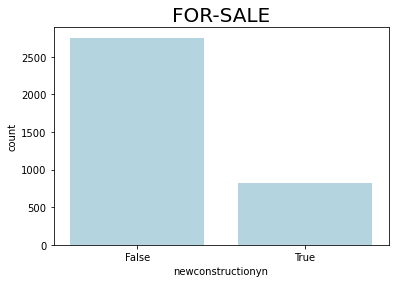

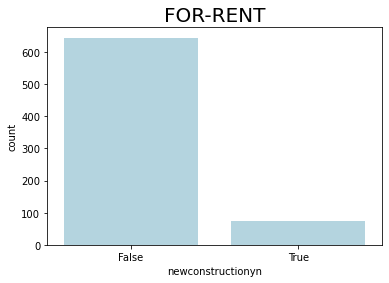

In [8]:
sns.countplot(data=sale_df, x=target, color='lightblue')
plt.title('FOR-SALE', fontsize=20)
plt.show()

sns.countplot(data=rent_df, x=target, color='lightblue')
plt.title('FOR-RENT', fontsize=20)
plt.show()

## Univariate Exploration

### Build Year

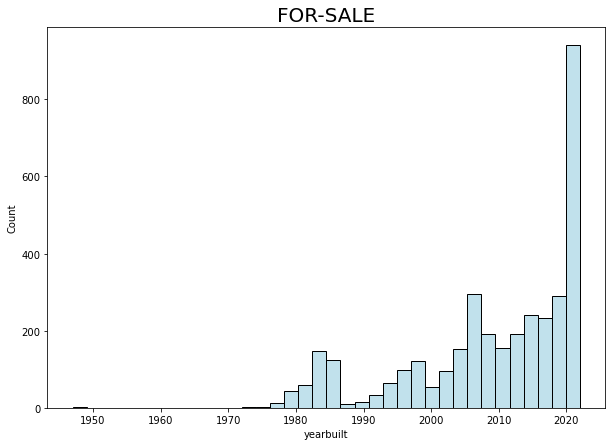

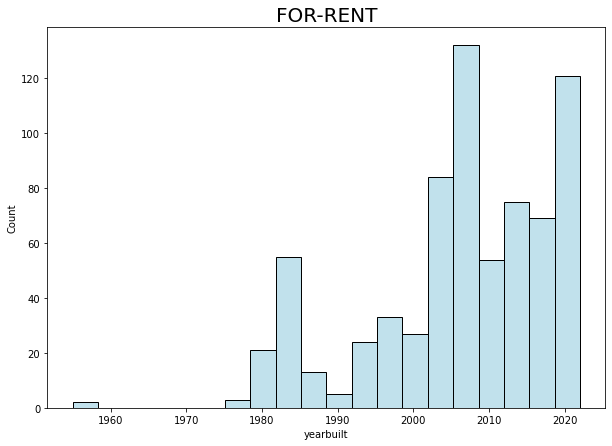

In [9]:
plt.figure(figsize=(10,7))
sns.histplot(sale_df.yearbuilt, color='lightblue')
plt.title('FOR-SALE', fontsize=20)
plt.show()

plt.figure(figsize=(10,7))
sns.histplot(rent_df.yearbuilt, color='lightblue')
plt.title('FOR-RENT', fontsize=20)
plt.show()

### Listing Date

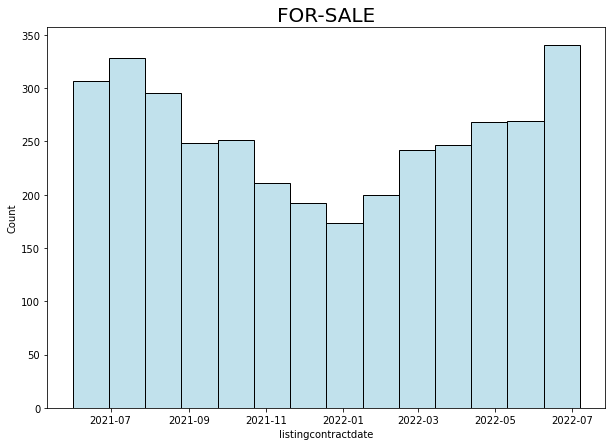

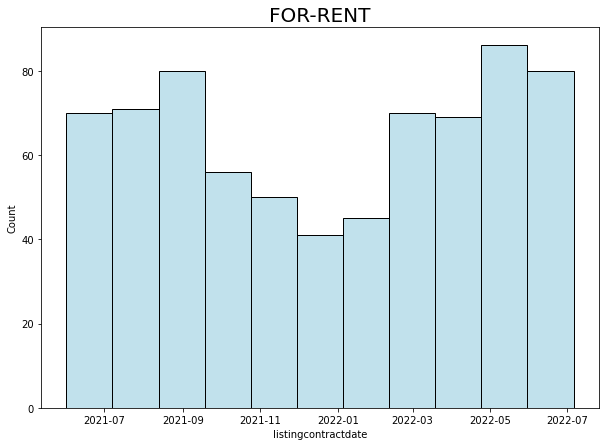

In [10]:
plt.figure(figsize=(10,7))
sns.histplot(sale_df.listingcontractdate, color='lightblue')
plt.title('FOR-SALE', fontsize=20)
plt.show()

plt.figure(figsize=(10,7))
sns.histplot(rent_df.listingcontractdate, color='lightblue')
plt.title('FOR-RENT', fontsize=20)
plt.show()

#### Listing Quarter

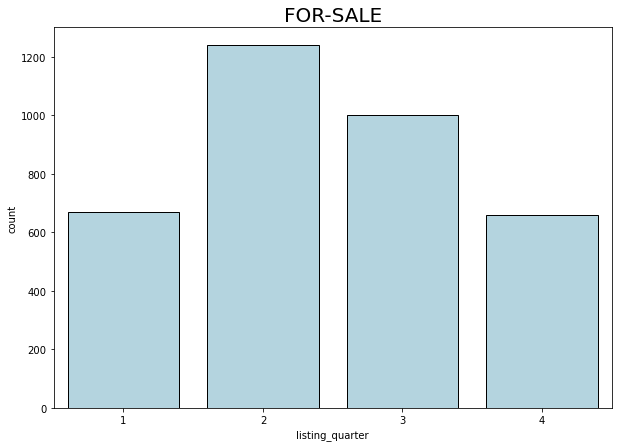

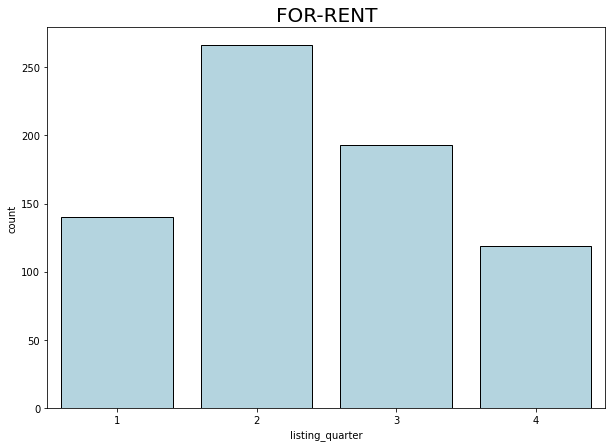

In [11]:
plt.figure(figsize=(10,7))
sns.countplot(sale_df.listing_quarter, color='lightblue', ec='black')
plt.title('FOR-SALE', fontsize=20)
plt.show()

plt.figure(figsize=(10,7))
sns.countplot(rent_df.listing_quarter, color='lightblue', ec='black')
plt.title('FOR-RENT', fontsize=20)
plt.show()

#### Listing Month

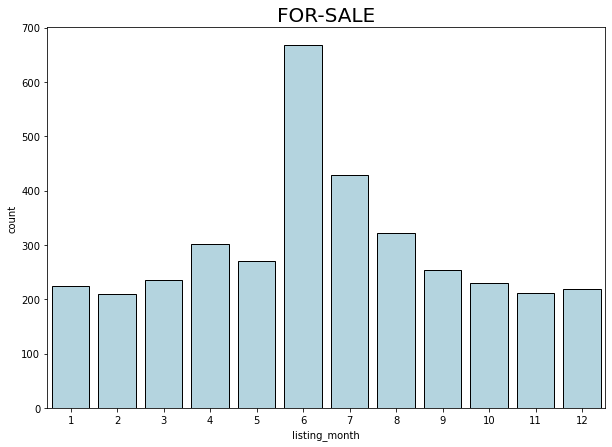

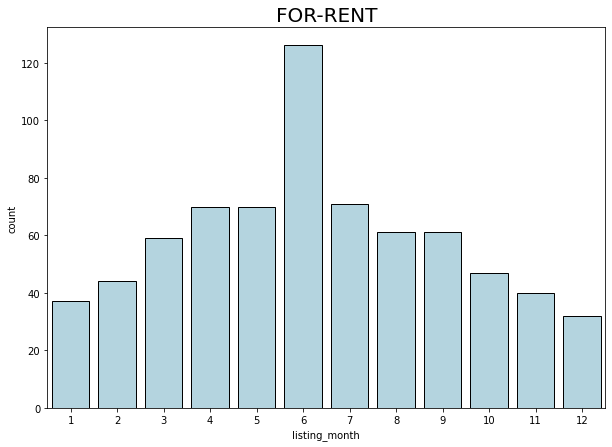

In [12]:
plt.figure(figsize=(10,7))
sns.countplot(sale_df.listing_month, color='lightblue', ec='black')
plt.title('FOR-SALE', fontsize=20)
plt.show()

plt.figure(figsize=(10,7))
sns.countplot(rent_df.listing_month, color='lightblue', ec='black')
plt.title('FOR-RENT', fontsize=20)
plt.show()

#### Listing Day-of-Month

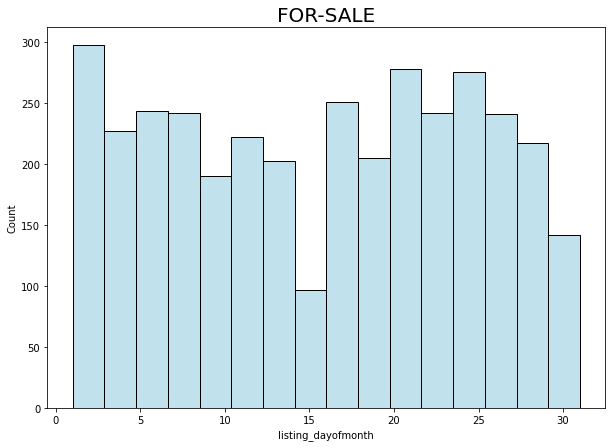

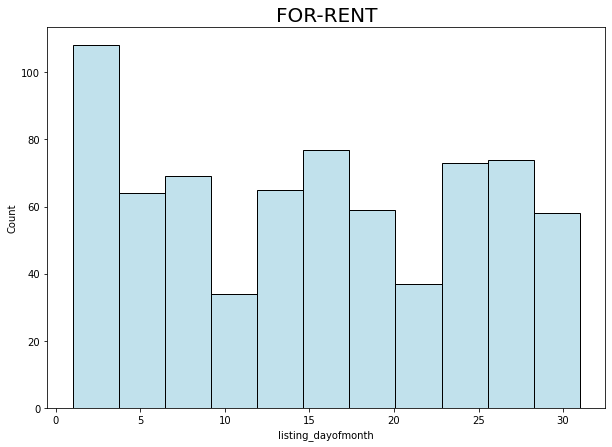

In [13]:
plt.figure(figsize=(10,7))
sns.histplot(sale_df.listing_dayofmonth, color='lightblue')
plt.title('FOR-SALE', fontsize=20)
plt.show()

plt.figure(figsize=(10,7))
sns.histplot(rent_df.listing_dayofmonth, color='lightblue')
plt.title('FOR-RENT', fontsize=20)
plt.show()

#### Listing Day-of-Week

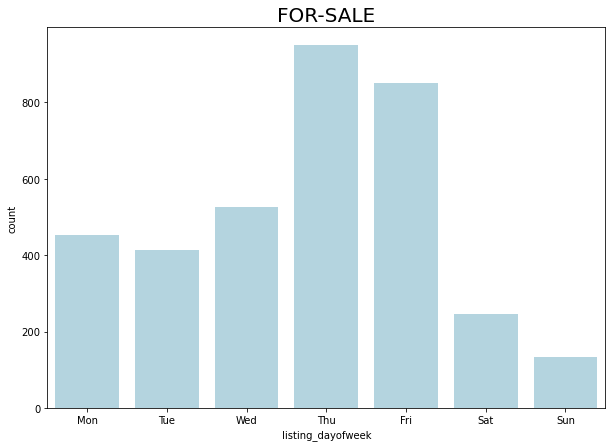

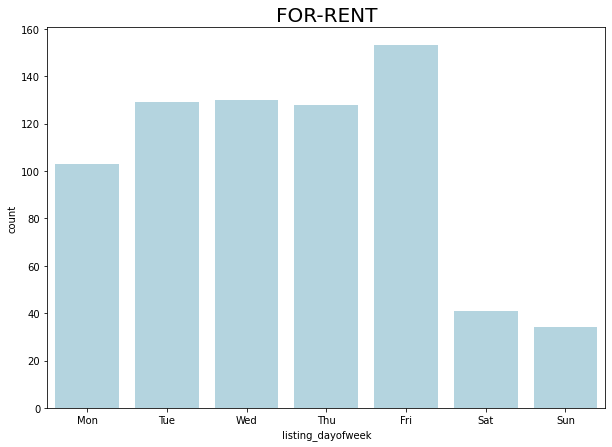

In [14]:
plt.figure(figsize=(10,7))
sns.countplot(sale_df.listing_dayofweek, color='lightblue')
plt.title('FOR-SALE', fontsize=20)
plt.show()

plt.figure(figsize=(10,7))
sns.countplot(rent_df.listing_dayofweek, color='lightblue')
plt.title('FOR-RENT', fontsize=20)
plt.show()

## Price

### Total Price

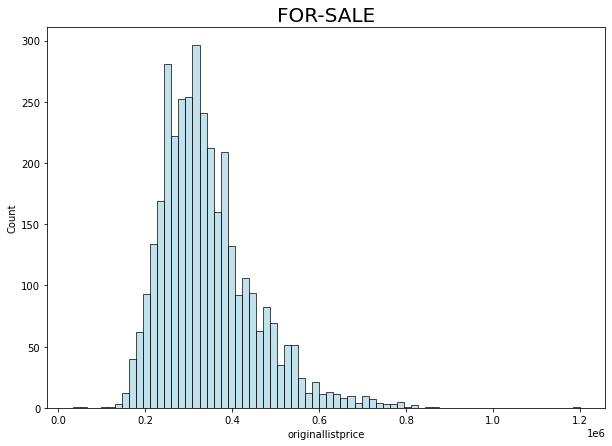

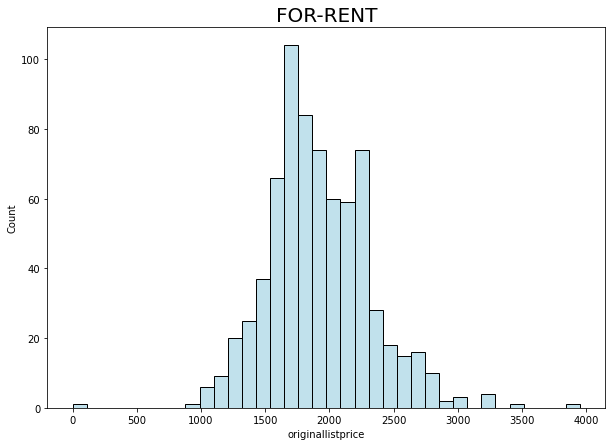

In [15]:
plt.figure(figsize=(10,7))
sns.histplot(sale_df.originallistprice, color='lightblue')
plt.title('FOR-SALE', fontsize=20)
plt.show()

plt.figure(figsize=(10,7))
sns.histplot(rent_df.originallistprice, color='lightblue')
plt.title('FOR-RENT', fontsize=20)
plt.show()

In [16]:
sale_df.originallistprice.min(), sale_df.originallistprice.max()

(33500.0, 1200000.0)

In [17]:
rent_df.originallistprice.min(), rent_df.originallistprice.max()

(1.0, 3950.0)

### Price-per-sqft

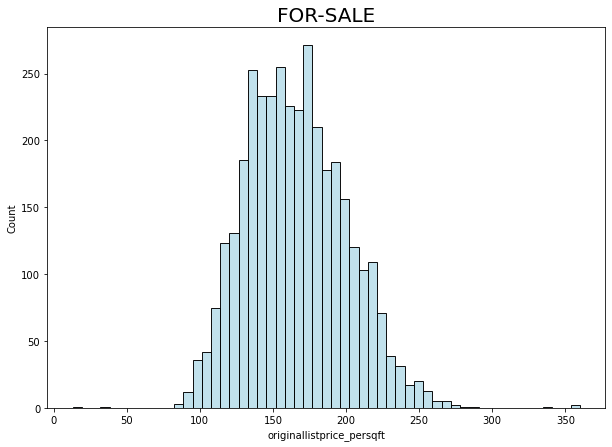

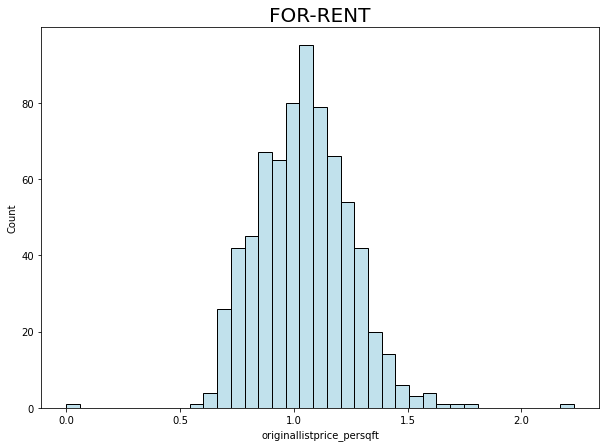

In [18]:
plt.figure(figsize=(10,7))
sns.histplot(sale_df.originallistprice_persqft, color='lightblue')
plt.title('FOR-SALE', fontsize=20)
plt.show()

plt.figure(figsize=(10,7))
sns.histplot(rent_df.originallistprice_persqft, color='lightblue')
plt.title('FOR-RENT', fontsize=20)
plt.show()

### Living Area

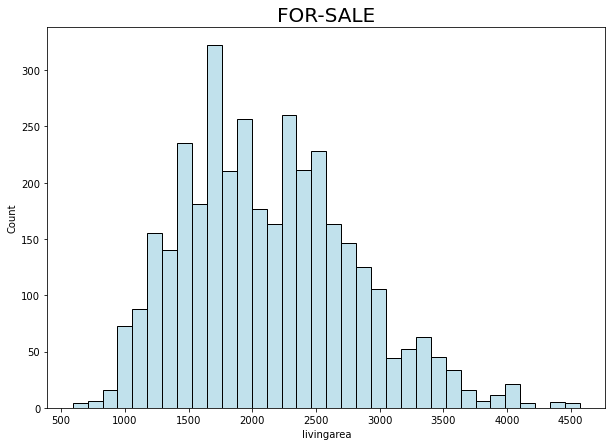

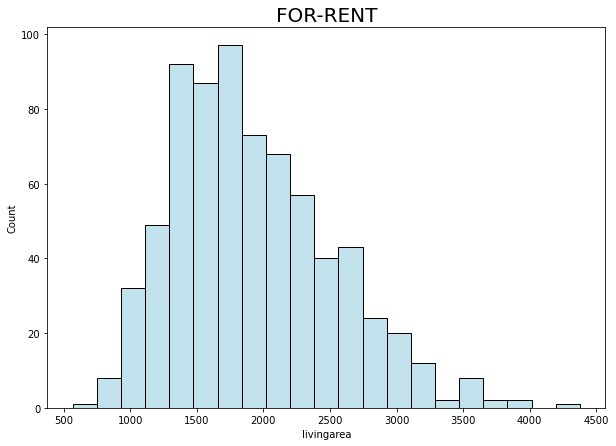

In [19]:
plt.figure(figsize=(10,7))
sns.histplot(sale_df.livingarea, color='lightblue')
plt.title('FOR-SALE', fontsize=20)
plt.show()

plt.figure(figsize=(10,7))
sns.histplot(rent_df.livingarea, color='lightblue')
plt.title('FOR-RENT', fontsize=20)
plt.show()

### Lot Size

In [20]:
# plt.figure(figsize=(10,7))
# sns.histplot(sale_df.lotsizearea, color='lightblue')
# plt.title('FOR-SALE', fontsize=20)
# plt.show()

# plt.figure(figsize=(10,7))
# sns.histplot(rent_df.lotsizearea, color='lightblue')
# plt.title('FOR-RENT', fontsize=20)
# plt.show()

## Bivariate Exploration: Variables as they relate to the target variable

### Build Year
First, we should examine build year, as this might be assumed to be the factor most strongly correlated with whether a property is new construction.

In [21]:
# plt.figure(figsize=(20,10))
# sns.swarmplot(data=sale_df, y='yearbuilt', x='newconstructionyn')
# plt.show()

# plt.figure(figsize=(20,10))
# sns.swarmplot(data=rent_df, y='yearbuilt', x='newconstructionyn')
# plt.show()

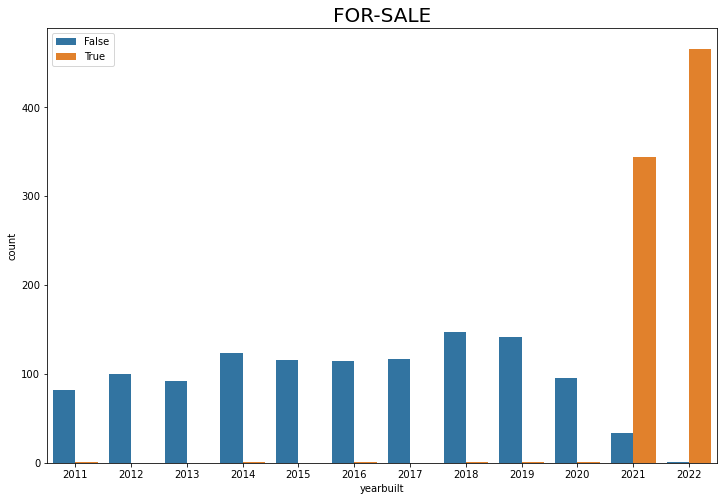

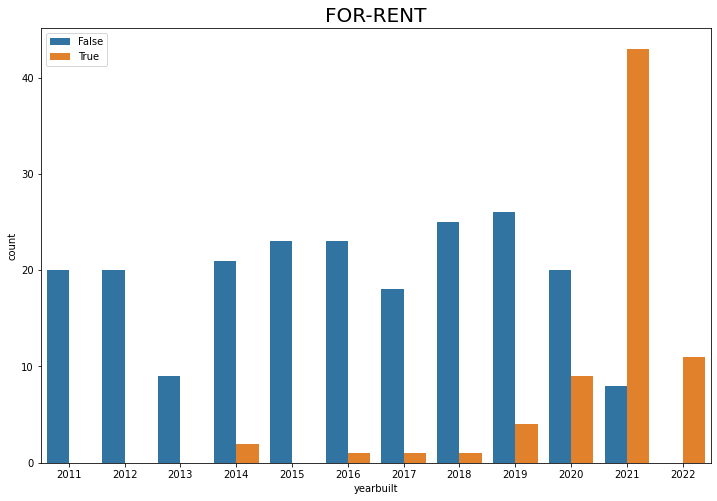

In [22]:
plt.figure(figsize=(12,8))
sns.countplot(data=sale_df[sale_df.yearbuilt > 2010], x='yearbuilt', hue=target)
plt.title('FOR-SALE', fontsize=20)
plt.legend(loc='upper left')
plt.show()

plt.figure(figsize=(12,8))
sns.countplot(data=rent_df[rent_df.yearbuilt > 2010], x='yearbuilt', hue=target)
plt.title('FOR-RENT', fontsize=20)
plt.legend(loc='upper left')
plt.show()


It seems that for-sale listings reliably have new construction listed as built in 2021 and 2022 (the years for which our dataset has listings). In rental listings however, this is less reliably true. Very old build years, such as 2014 - 2018, seem likely to represent inaccuracies in the listing, since it is unreasonable to assume that a property built in 2014 has had 0 occupants until 2021. (Innacuracies in rental listings would be consistent with an anecdotal assumption that less time and effort would go into creating a rental listing, since far less money is at stake for the listing agent and the client)

We will now explore build year as it relates to the listing date.

#### Whether a property was built in the last two calendar years and whether it is new construction:

In [23]:
pd.crosstab(sale_df[target], sale_df.built_last_two_years)

built_last_two_years,False,True
newconstructionyn,,
False,2676,78
True,6,811


In [24]:
pd.crosstab(rent_df[target], rent_df.built_last_two_years)

built_last_two_years,False,True
newconstructionyn,,
False,630,15
True,13,60


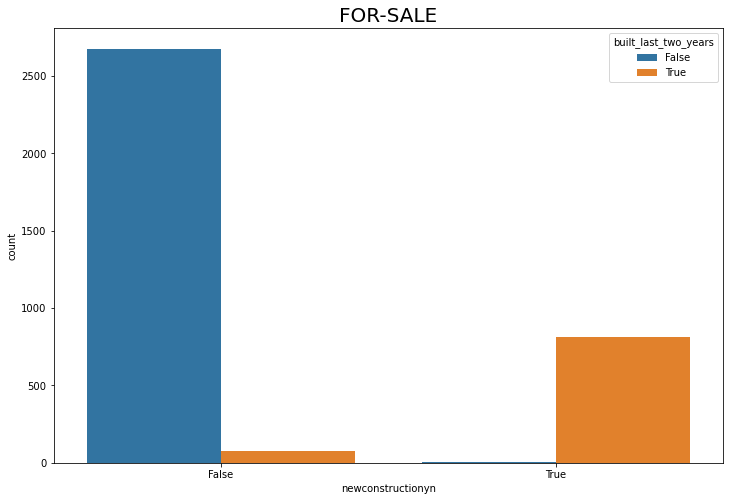

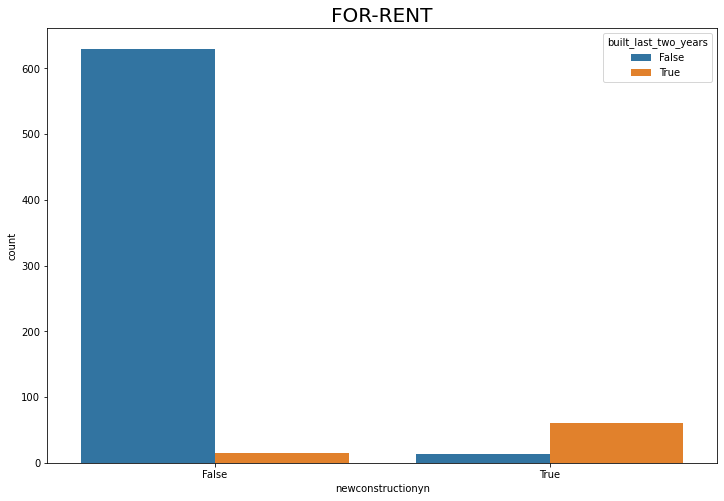

In [25]:
plt.figure(figsize=(12,8))
sns.countplot(data=sale_df, x=target, hue='built_last_two_years')
plt.title('FOR-SALE', fontsize=20)
plt.show()

plt.figure(figsize=(12,8))
sns.countplot(data=rent_df, x=target, hue='built_last_two_years')
plt.title('FOR-RENT', fontsize=20)
plt.show()

Here we see that whether a property's listed build year was within the last two years is likely to be predictive of whether the property is new construction, though this feature alone is not completely reliable. 

#### Do new builds have higher list prices than existing homes (when controlling for build year)?

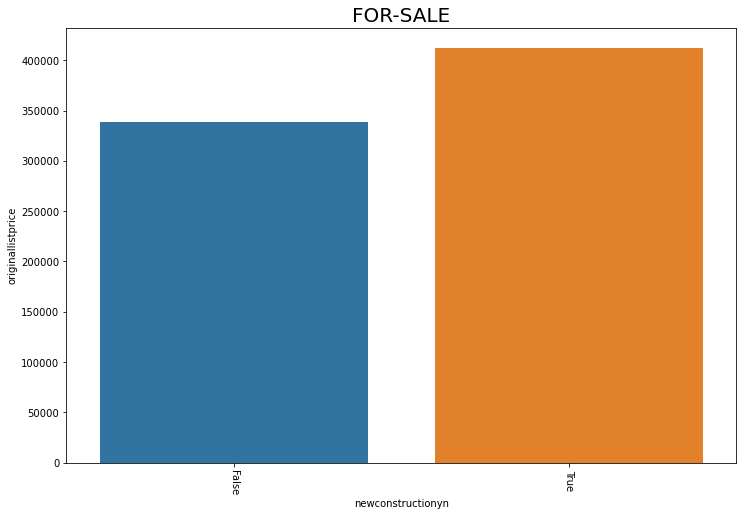

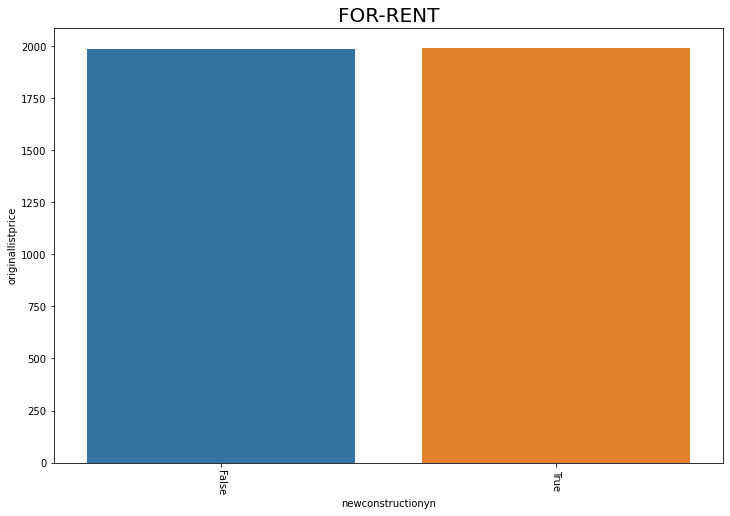

In [26]:
plt.figure(figsize=(12,8))
sns.barplot(data=sale_df[sale_df.yearbuilt>1990], 
            x=target, 
            y='originallistprice', 
            ci=None)
plt.xticks(rotation=270)
plt.title('FOR-SALE', fontsize=20)
plt.show()

plt.figure(figsize=(12,8))
sns.barplot(data=rent_df[rent_df.yearbuilt>1990], 
            x=target, 
            y='originallistprice', 
            ci=None)
plt.xticks(rotation=270)
plt.title('FOR-RENT', fontsize=20)
plt.show()


In for sale listings, New construction does appear to have a higher average list price than existing homes. There appears to be very little difference in average price for rentals, however. 

#### Do new builds have higher list prices than existing homes (when controlling for build year)?

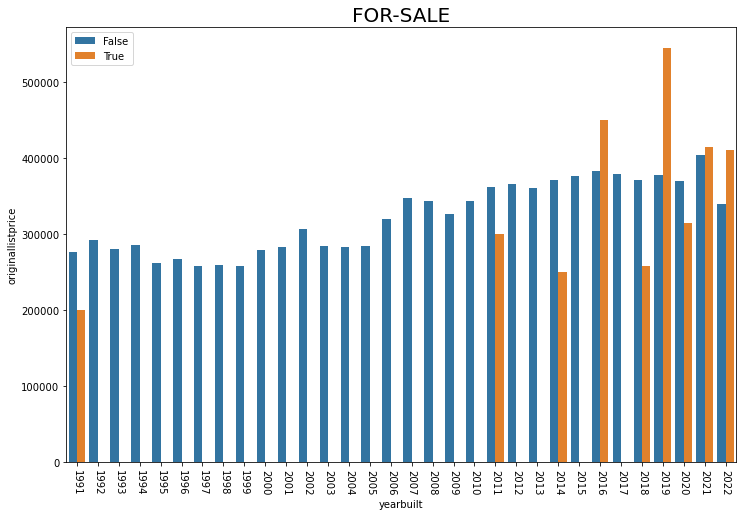

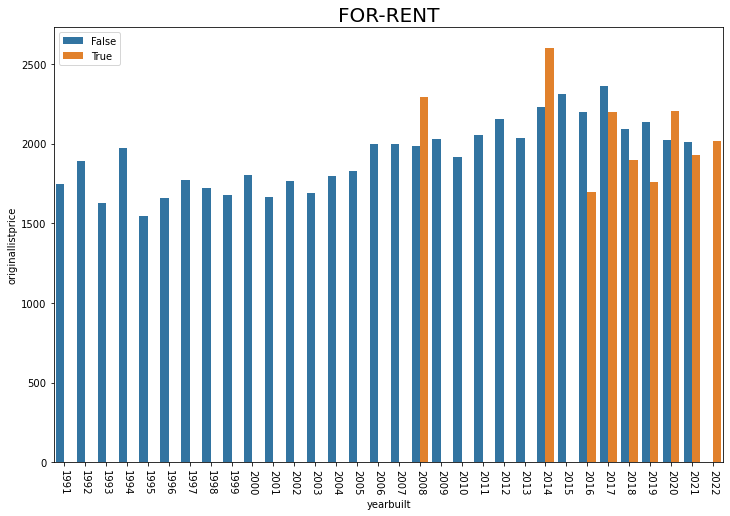

In [27]:
plt.figure(figsize=(12,8))
sns.barplot(data=sale_df[sale_df.yearbuilt>1990], 
            x='yearbuilt', 
            y='originallistprice', 
            hue=target,
            ci=None)
plt.xticks(rotation=270)
plt.legend(loc='upper left')
plt.title('FOR-SALE', fontsize=20)
plt.show()

plt.figure(figsize=(12,8))
sns.barplot(data=rent_df[rent_df.yearbuilt>1990], 
            x='yearbuilt', 
            y='originallistprice', 
            hue=target,
            ci=None)
plt.xticks(rotation=270)
plt.legend(loc='upper left')
plt.title('FOR-RENT', fontsize=20)
plt.show()

This appears inconclusive, as some years indicate that new construction has a higher average list price, while in some years the existing homes have the higher average list price. However, I expect this variance is due mainly to the relatively small number of new builds located within each build year. 

#### What about price-per-square-foot? Do new builds have a higher average price-per-sqft than existing homes?

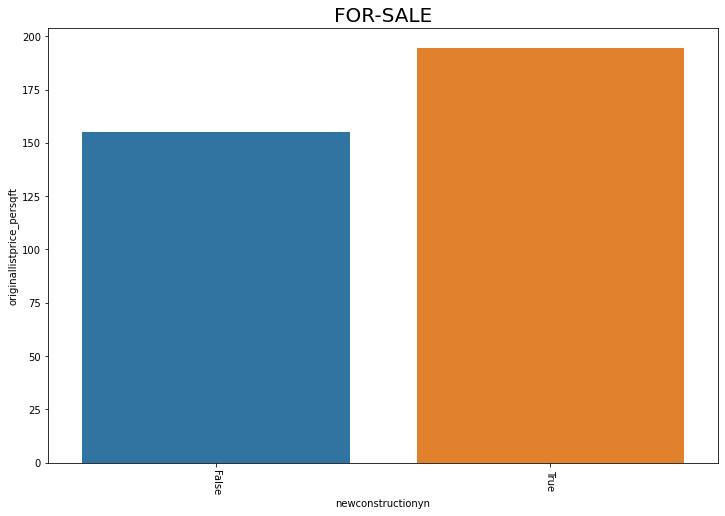

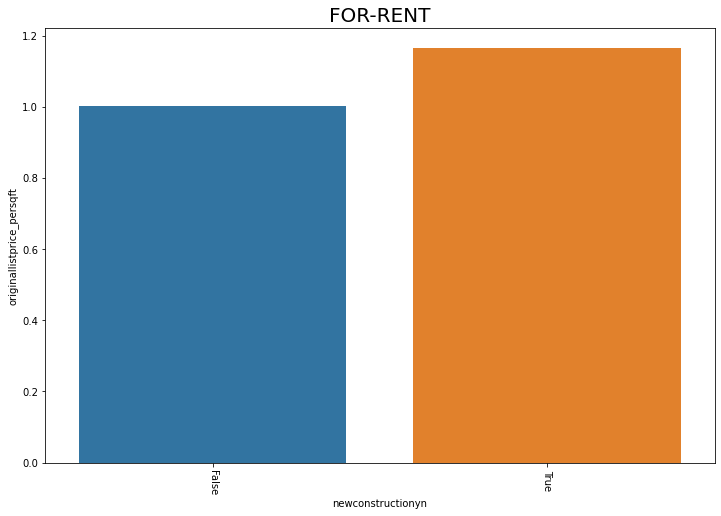

In [28]:
plt.figure(figsize=(12,8))
sns.barplot(data=sale_df[sale_df.yearbuilt>1990], 
            x=target, 
            y='originallistprice_persqft', 
            ci=None)
plt.xticks(rotation=270)
plt.title('FOR-SALE', fontsize=20)
plt.show()

plt.figure(figsize=(12,8))
sns.barplot(data=rent_df[rent_df.yearbuilt>1990], 
            x=target, 
            y='originallistprice_persqft', 
            ci=None)
plt.xticks(rotation=270)
plt.title('FOR-RENT', fontsize=20)
plt.show()

Here there appears to be a significant difference in the average price for both for-sale and rental listings.

#### Price-per-sqft when controlling for build year

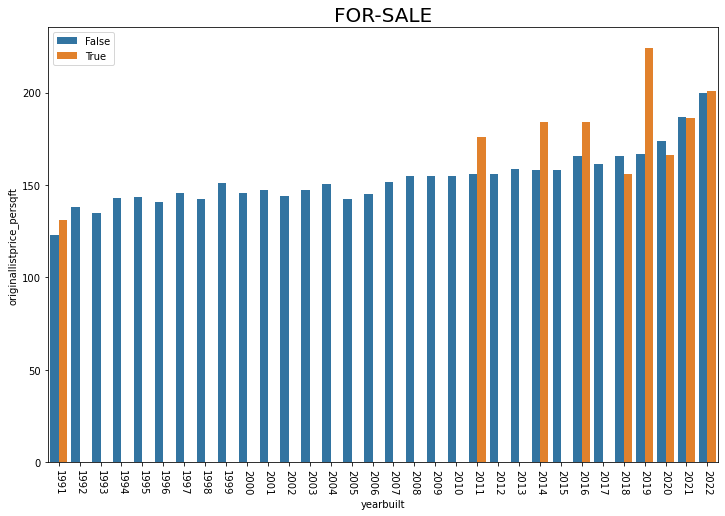

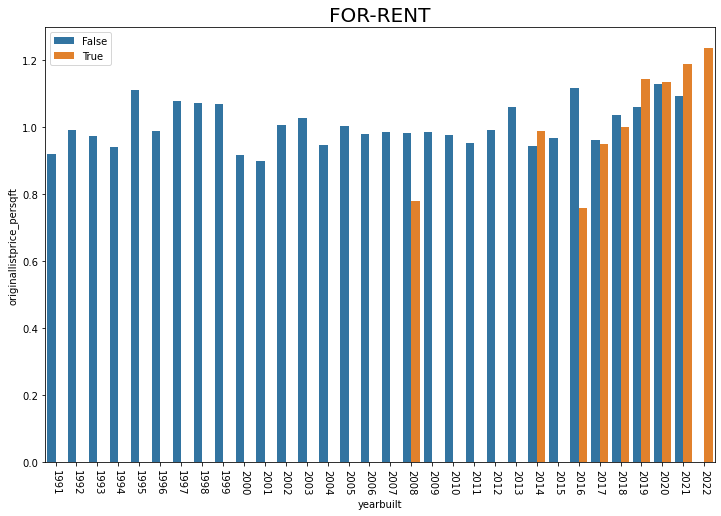

In [29]:
plt.figure(figsize=(12,8))
sns.barplot(data=sale_df[sale_df.yearbuilt>1990], 
            x='yearbuilt', 
            y='originallistprice_persqft', 
            hue=target,
            ci=None)
plt.xticks(rotation=270)
plt.legend(loc='upper left')
plt.title('FOR-SALE', fontsize=20)
plt.show()

plt.figure(figsize=(12,8))
sns.barplot(data=rent_df[rent_df.yearbuilt>1990], 
            x='yearbuilt', 
            y='originallistprice_persqft', 
            hue=target,
            ci=None)
plt.xticks(rotation=270)
plt.legend(loc='upper left')
plt.title('FOR-RENT', fontsize=20)
plt.show()

Again, this appears inconclusive, likely due to a low sample size of new-builds in most years

#### It seems unlikely that a new build would ever NOT have central heating or cooling. Let's take a look.

#### Heating

In [30]:
pd.crosstab(sale_df.heating_central, sale_df[target])

newconstructionyn,False,True
heating_central,,
False,56,22
True,2698,795


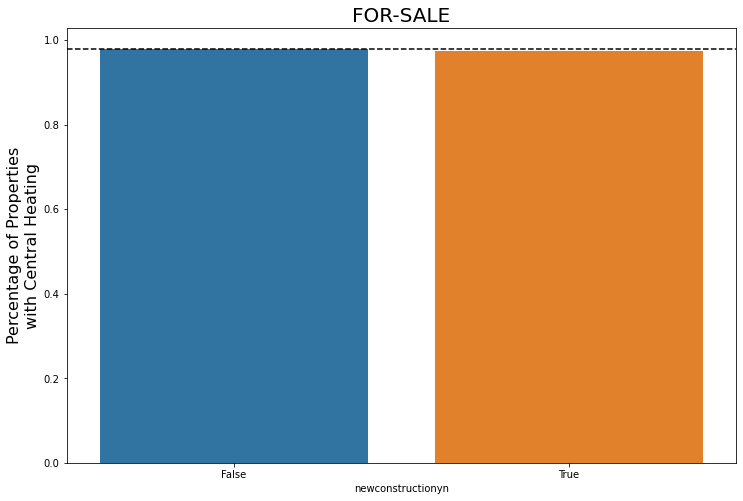

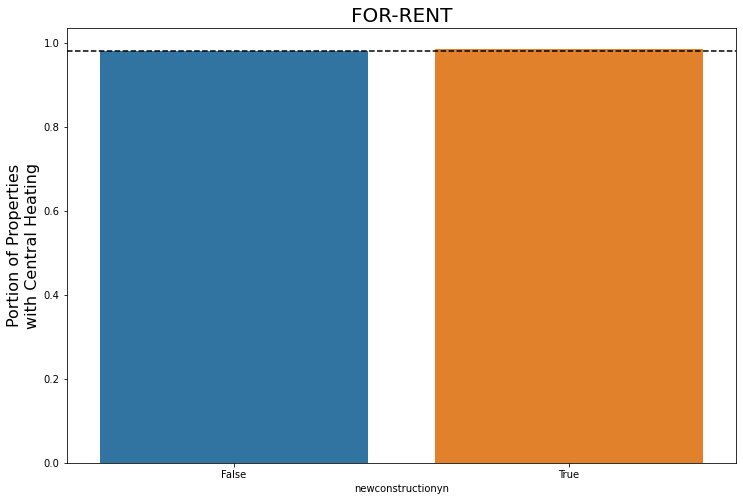

In [31]:
heating_central_rates = (pd.DataFrame(sale_df.groupby(by=target).mean().heating_central)
                         .reset_index()
                         .sort_values(by='heating_central'))
plt.figure(figsize=(12,8))
sns.barplot(data=heating_central_rates, 
            x=target,
            y='heating_central')
plt.axhline(sale_df.heating_central.mean(), ls='--', color='black')
plt.title('FOR-SALE', fontsize=20)
plt.ylabel('Percentage of Properties\nwith Central Heating', fontsize=16)
plt.show()

heating_central_rates = (pd.DataFrame(rent_df.groupby(by=target).mean().heating_central)
                         .reset_index()
                         .sort_values(by='heating_central'))

plt.figure(figsize=(12,8))
sns.barplot(data=heating_central_rates, 
            x=target,
            y='heating_central')
plt.axhline(rent_df.heating_central.mean(), ls='--', color='black')
plt.title('FOR-RENT', fontsize=20)
plt.ylabel('Portion of Properties\nwith Central Heating', fontsize=16)
plt.show()

#### Cooling

In [32]:
pd.crosstab(sale_df.cooling_central, sale_df[target])

newconstructionyn,False,True
cooling_central,,
False,2,7
True,2752,810


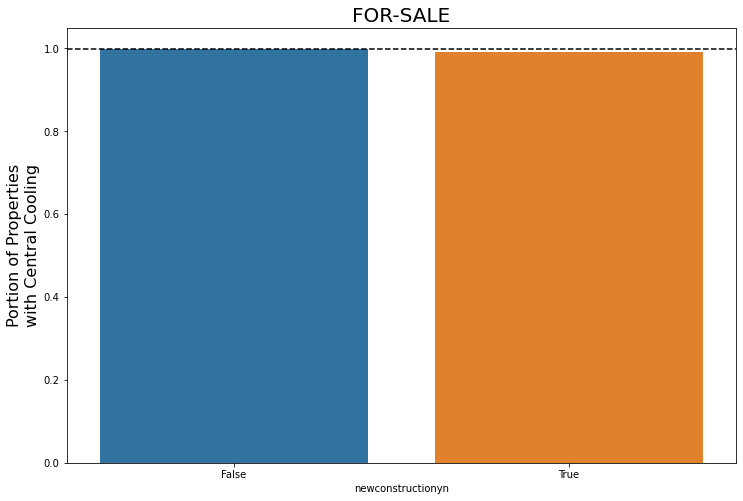

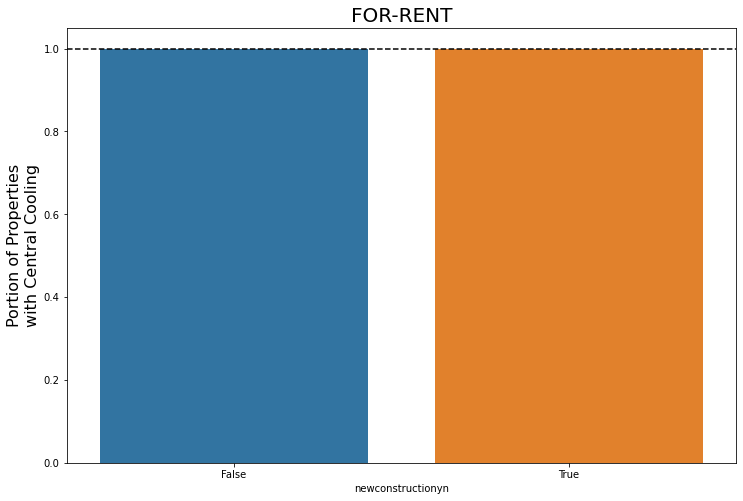

In [33]:
cooling_central_rates = (pd.DataFrame(sale_df.groupby(by=target).mean().cooling_central)
                         .reset_index()
                         .sort_values(by='cooling_central'))
plt.figure(figsize=(12,8))
sns.barplot(data=cooling_central_rates, 
            x=target,
            y='cooling_central')
plt.axhline(sale_df.cooling_central.mean(), ls='--', color='black')
plt.title('FOR-SALE', fontsize=20)
plt.ylabel('Portion of Properties\nwith Central Cooling', fontsize=16)
plt.show()

cooling_central_rates = (pd.DataFrame(rent_df.groupby(by=target).mean().cooling_central)
                         .reset_index()
                         .sort_values(by='cooling_central'))

plt.figure(figsize=(12,8))
sns.barplot(data=cooling_central_rates, 
            x=target,
            y='cooling_central')
plt.axhline(rent_df.cooling_central.mean(), ls='--', color='black')
plt.title('FOR-RENT', fontsize=20)
plt.ylabel('Portion of Properties\nwith Central Cooling', fontsize=16)
plt.show()

There does not appear to be a significant difference in the percentage of properties that have central heating or cooling among new construction vs existing homes.

#### It also seems that a newly constructed home would be less likely to have window or wall cooling units. Let's take a look:

In [34]:
pd.crosstab(sale_df[target], sale_df.cooling_windowwall)

cooling_windowwall,False,True
newconstructionyn,,
False,2736,18
True,817,0


In [35]:
pd.crosstab(rent_df[target], rent_df.cooling_windowwall)

cooling_windowwall,False
newconstructionyn,
False,645
True,73


since there are no rental listings with window/wall units, this will not be a useful feature for rental listings.

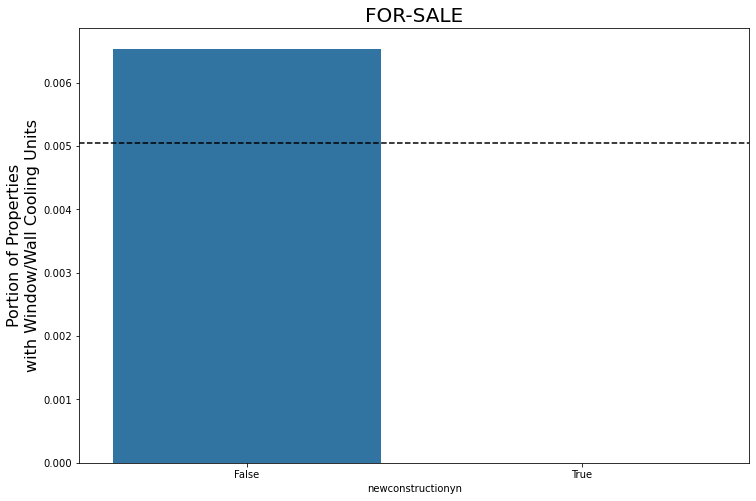

In [36]:
cooling_windowwall_rates = (pd.DataFrame(sale_df.groupby(by=target).mean().cooling_windowwall)
                         .reset_index()
                         .sort_values(by='cooling_windowwall'))
plt.figure(figsize=(12,8))
sns.barplot(data=cooling_windowwall_rates, 
            x=target,
            y='cooling_windowwall')
plt.axhline(sale_df.cooling_windowwall.mean(), ls='--', color='black')
plt.title('FOR-SALE', fontsize=20)
plt.ylabel('Portion of Properties\nwith Window/Wall Cooling Units', fontsize=16)
plt.show()

It might be a useful feature for the for-sale listings, since none of the new construction homes have window units. However, only .06% of older homes have them, so the difference may not be significant. Some staistical testing could be useful here to determine the significance of this difference. 

#### Do new construction properties differ from existing properties in the number of stories?
Anecdotally, new builds in my area are much more likely to be multi-story than older homes, so perhaps this is true in our dataset as well. 

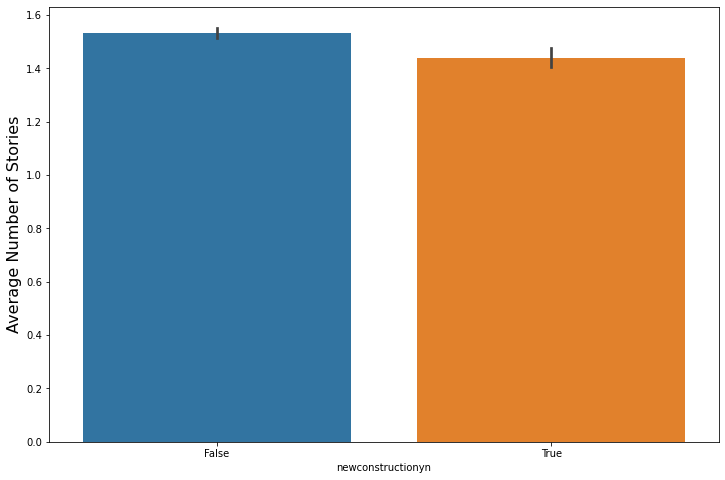

In [37]:
plt.figure(figsize=(12,8))
sns.barplot(data=sale_df, x=target, y='stories')
plt.ylabel('Average Number of Stories', fontsize=16)
plt.show()

While it does appear that existing homes have a higher average number of stories, the difference is rather small, and some statistical testing should be applied here to determine the significance of this difference. 

### Multivariate exploration

Now, I'll take a more shotgun approach at exploring whether any combinations of two variables appear to be possible predictors of new construction.

No mutually exclusive clusters of points are immediately identified here, so perhaps combinations ofthese variables are not useful in determining new construction. 

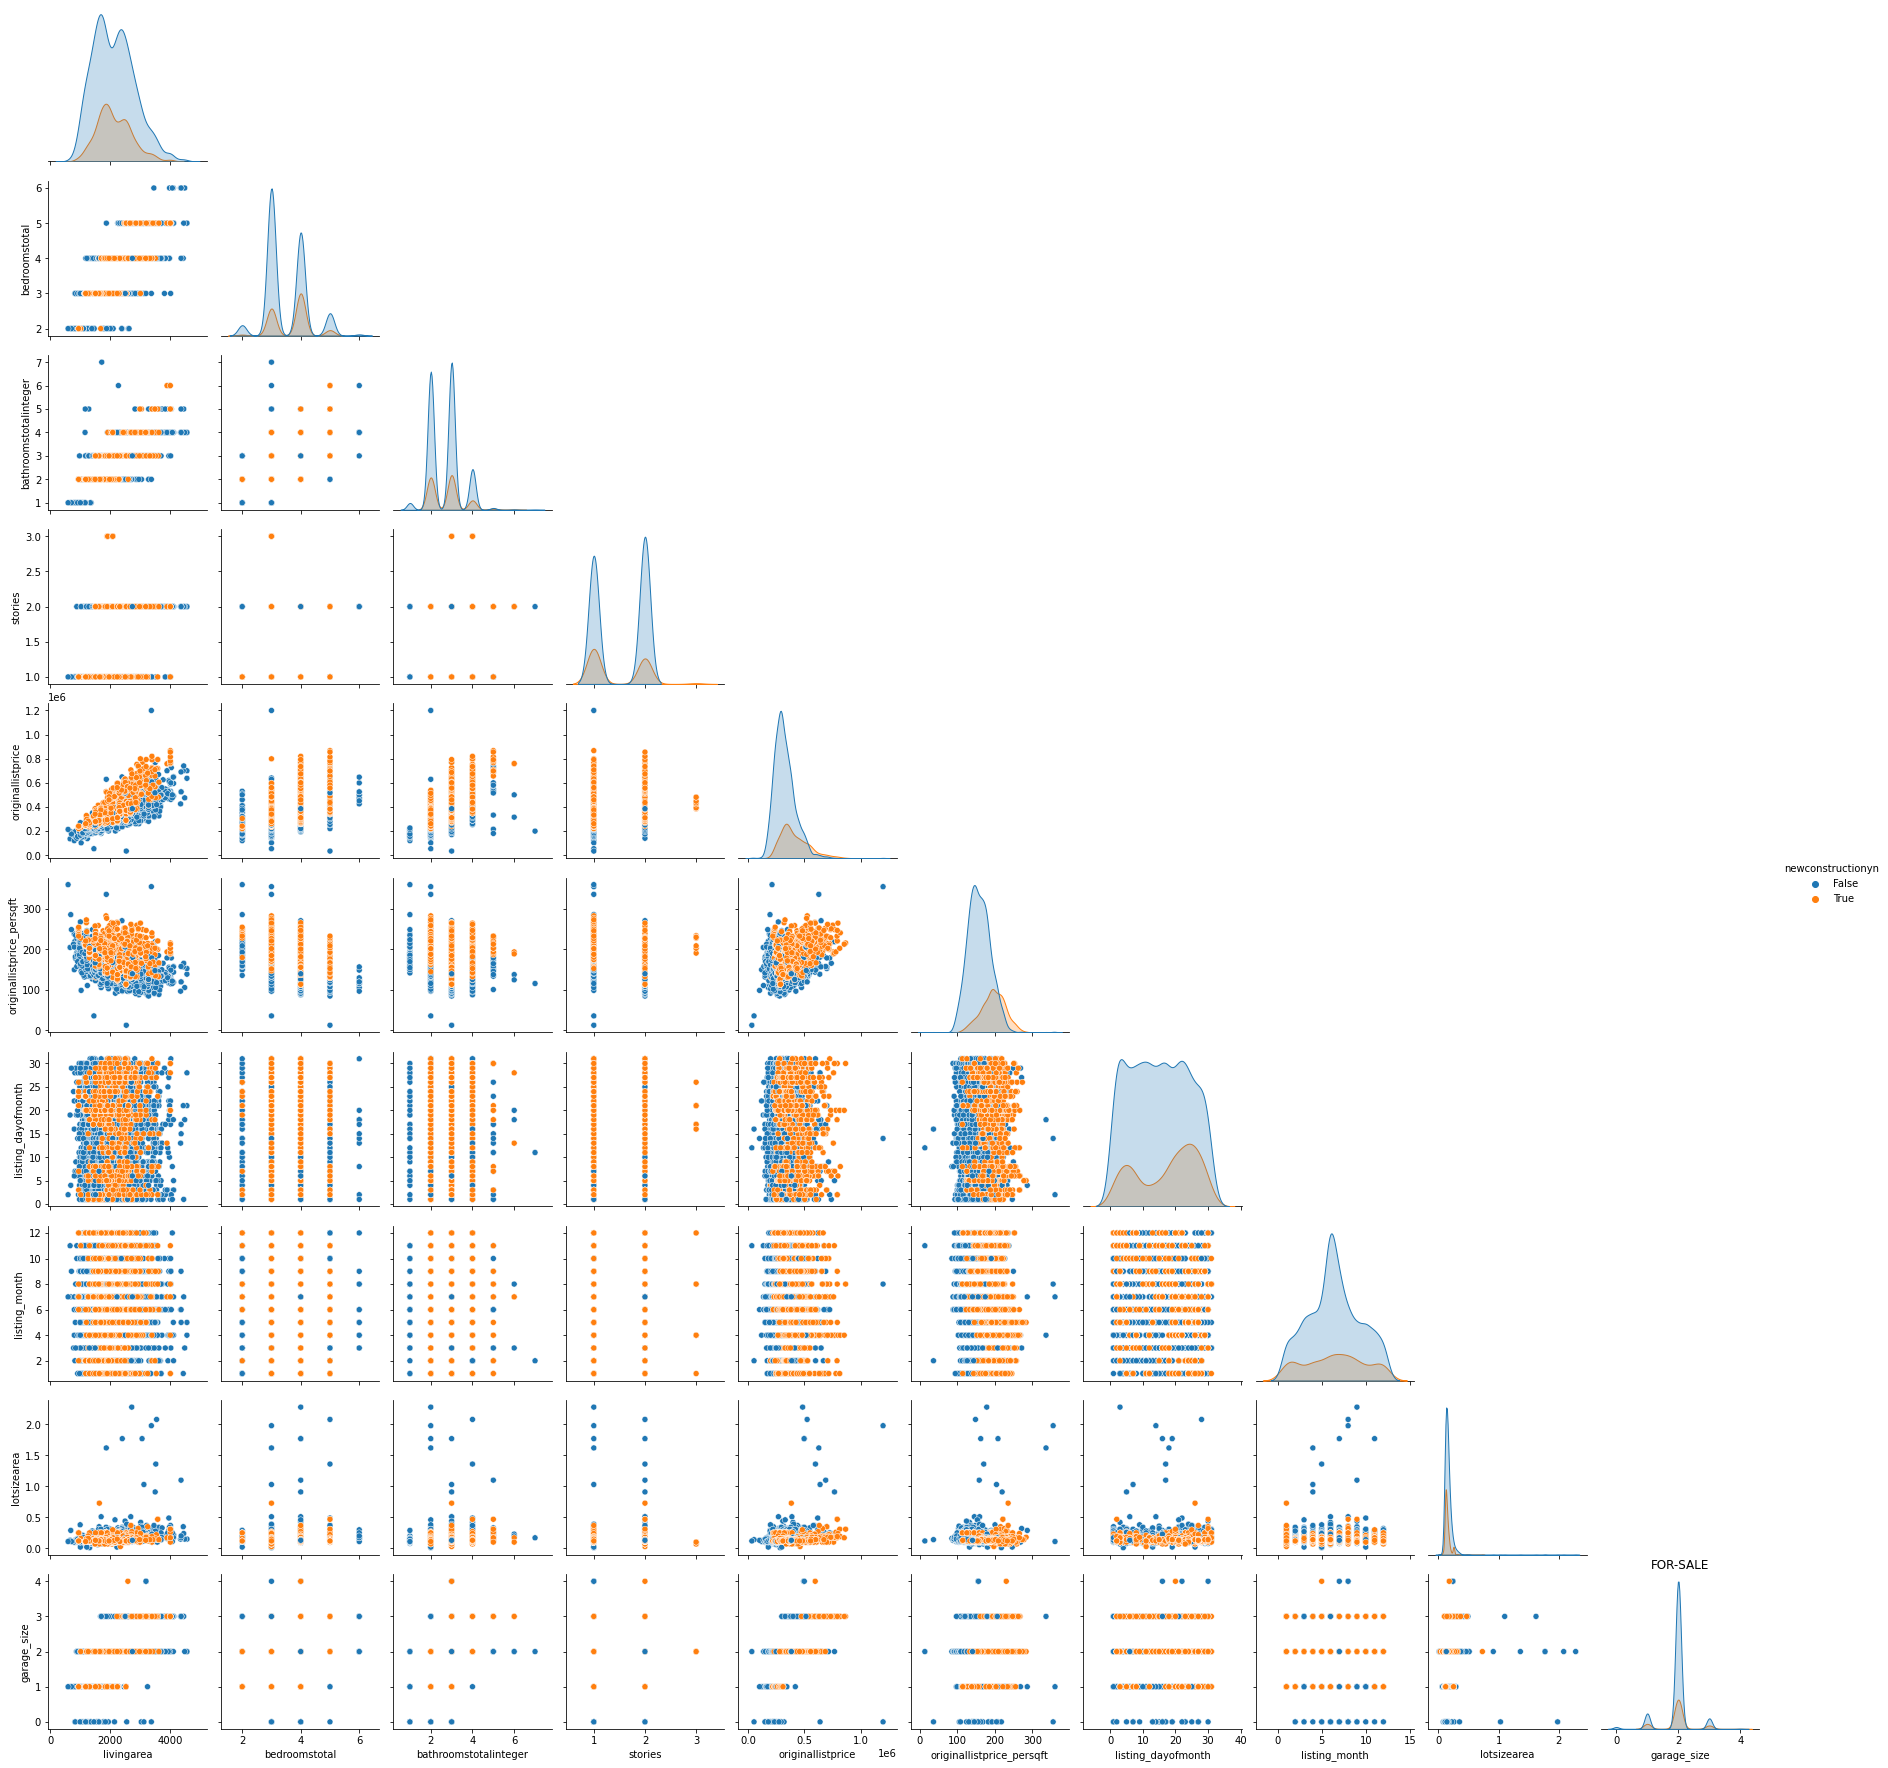

In [38]:
cols = ['livingarea', 'bedroomstotal', 'bathroomstotalinteger', 'stories', 
        'originallistprice', 'originallistprice_persqft', 
        'listing_dayofmonth', 'listing_month', 'lotsizearea', 'garage_size']
sns.pairplot(sale_df[cols + [target]], hue=target, corner=True)
plt.title('FOR-SALE')
plt.show()

One thing I notice here is that there is no new construction with a garage size of 0 (no garage). There is also new construction with a lot size greater than 1, and very few greater than .5. Let's explore these things in more depth.

#### Are new builds more likely to have a garage?

In [39]:
garage_rates = (pd.DataFrame(sale_df.groupby(by=target).mean().garageyn)
                             .reset_index()
                             .sort_values(by='garageyn'))
garage_rates

,newconstructionyn,garageyn
0,False,0.990559
1,True,1.000000


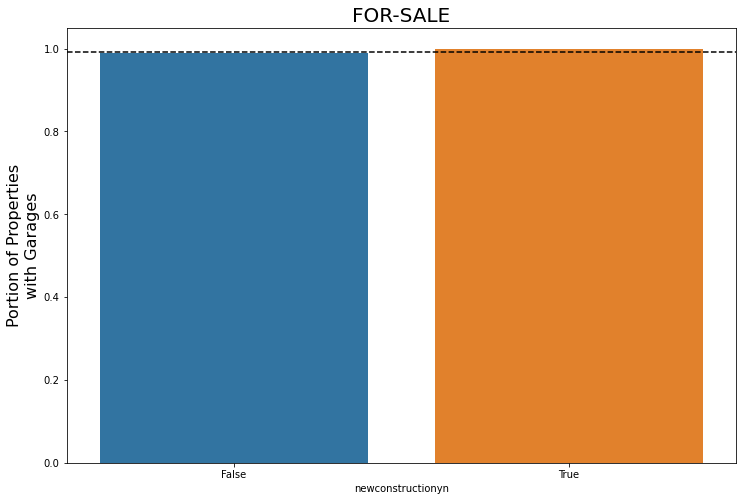

In [40]:
plt.figure(figsize=(12,8))
sns.barplot(data=garage_rates, 
            x=target,
            y='garageyn')
plt.axhline(sale_df.garageyn.mean(), ls='--', color='black')
plt.title('FOR-SALE', fontsize=20)
plt.ylabel('Portion of Properties\nwith Garages', fontsize=16)
plt.show()

In [41]:
garage_rates = (pd.DataFrame(rent_df.groupby(by=target).mean().garageyn)
                             .reset_index()
                             .sort_values(by='garageyn'))
garage_rates

,newconstructionyn,garageyn
0,False,0.956589
1,True,1.000000


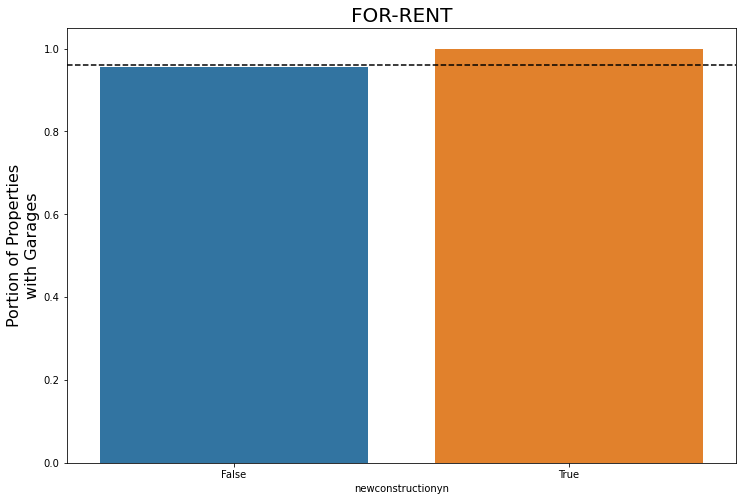

In [42]:
plt.figure(figsize=(12,8))
sns.barplot(data=garage_rates, 
            x=target,
            y='garageyn')
plt.axhline(rent_df.garageyn.mean(), ls='--', color='black')
plt.title('FOR-RENT', fontsize=20)
plt.ylabel('Portion of Properties\nwith Garages', fontsize=16)
plt.show()

While it is true that no new construction is without a garage, very few homes in the dataset at large are without a garage, so this may not be a useful feature. The difference in proportion is larger in rentals than in for-sale listings. We should run a statistical test to determine if this difference is statistically significant. 

#### Are new builds likely to have a smaller lot size?

In [43]:
# plt.figure(figsize=(12,8))
# sns.swarmplot(data=sale_df, x=target, y='lotsizearea')
# plt.grid()
# plt.title('FOR-SALE', fontsize=20)
# plt.grid(axis='x')
# plt.yticks(np.arange(0, round(sale_df.lotsizearea.max(), 1),.1))
# plt.show()

# plt.figure(figsize=(12,8))
# sns.swarmplot(data=rent_df, x=target, y='lotsizearea')
# plt.grid()
# plt.title('FOR-RENT', fontsize=20)
# plt.show()

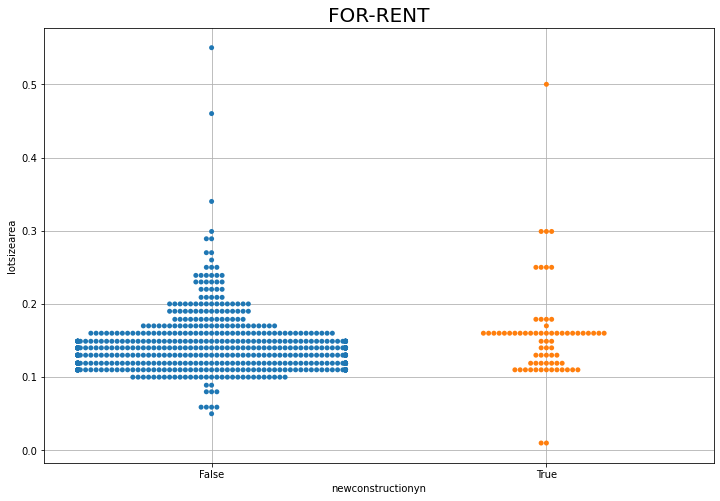

In [44]:
# removing lot sizes > 1 for more effective visualization
plt.figure(figsize=(12,8))
sns.swarmplot(data=rent_df[rent_df.lotsizearea < 1], x=target, y='lotsizearea')
plt.grid()
plt.title('FOR-RENT', fontsize=20)
plt.show()

We can see here that there may be a cutoff point around .2 where a home with a lot size smaller than that cutoff point is much more likely to be new construction, at least in for-sale listings.

In [45]:
rent_df.lotsizearea.value_counts().sort_index()

0.010       2
0.050       1
0.059       4
0.080       3
0.089       2
0.100      30
0.110     113
0.119     121
0.130      80
0.140      90
0.149      78
0.160      71
0.170      27
0.179      18
0.190      16
0.200      16
0.209       5
0.220       5
0.230       6
0.239       6
0.250       7
0.260       1
0.270       2
0.289       2
0.299       4
0.340       1
0.460       1
0.500       1
0.550       1
13.000      1
28.000      1
36.000      1
61.149      1
Name: lotsizearea, dtype: int64

First, let's examine lot sizes less than 0.

In [46]:
sale_df.lotsizearea.value_counts().sort_index()

0.010      1
0.020      3
0.029      1
0.059      1
0.070     12
0.080      5
0.089     10
0.100    165
0.110    402
0.119    623
0.130    337
0.140    472
0.149    359
0.160    227
0.170    237
0.179    134
0.190    119
0.200     94
0.209     61
0.220     43
0.230     45
0.239     27
0.250     67
0.260     21
0.270     13
0.280     10
0.289     12
0.299     10
0.309     11
0.320      7
0.330      4
0.340      8
0.349      4
0.359      1
0.369      4
0.380      1
0.390      1
0.419      1
0.440      1
0.460      1
0.469      2
0.489      1
0.510      2
0.729      1
0.910      1
1.030      1
1.100      1
1.360      1
1.620      1
1.770      2
1.979      1
2.080      1
2.279      1
Name: lotsizearea, dtype: int64

In [47]:
(sale_df.lotsizearea < 0).mean()

0.0

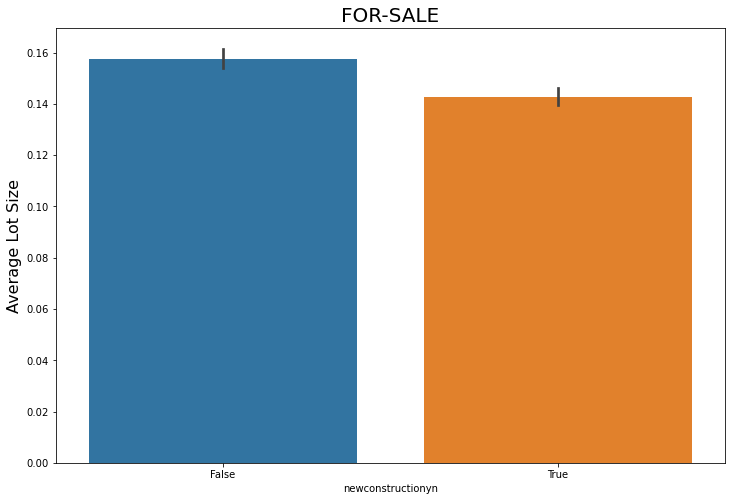

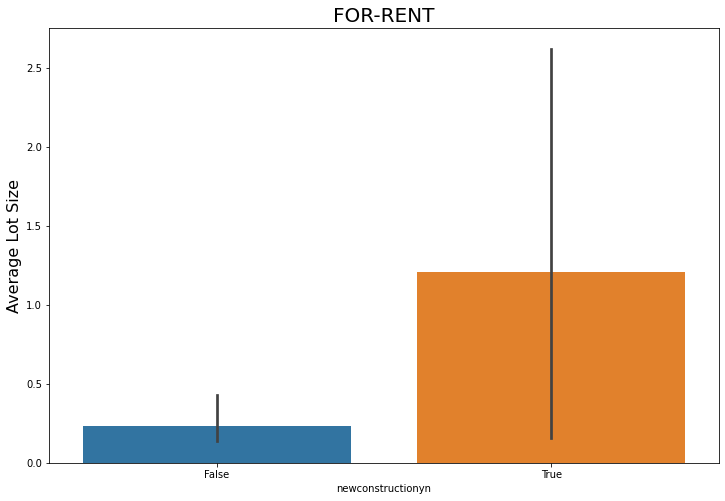

In [48]:
plt.figure(figsize=(12,8))
sns.barplot(data=sale_df, x=target, y='lotsizearea')
plt.ylabel('Average Lot Size', fontsize=16)
plt.title('FOR-SALE', fontsize=20)
plt.show()

plt.figure(figsize=(12,8))
sns.barplot(data=rent_df, x=target, y='lotsizearea')
plt.ylabel('Average Lot Size', fontsize=16)
plt.title('FOR-RENT', fontsize=20)
plt.show()

While for-sale properties do appear to have a significantly different average lot size, it seems we do not have enough data to determine conclusively whether this is also true for rentals (as evidenced by the very large confidence interval). 

#### Are new builds more likely to have small lot sizes? (0.2 or less)

In [49]:
lotsizearea_small_rates = (pd.DataFrame(sale_df.groupby(by=target).mean().lotsizearea_small)
                             .reset_index()
                             .sort_values(by='lotsizearea_small'))
lotsizearea_small_rates

,newconstructionyn,lotsizearea_small
0,False,0.889615
1,True,0.920441


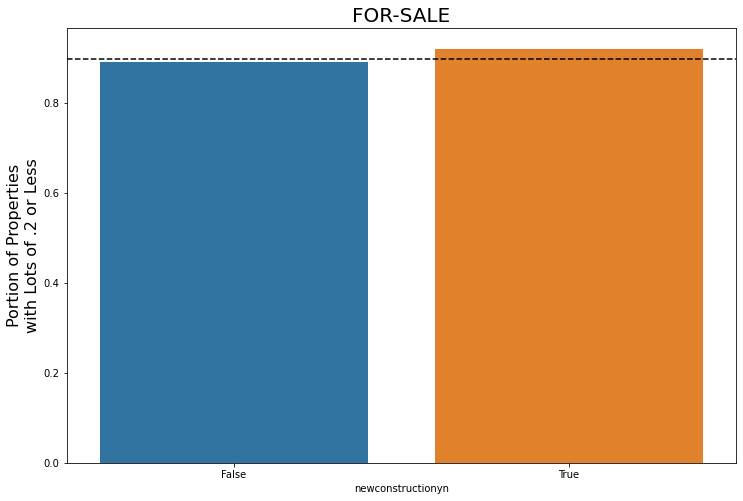

In [50]:
plt.figure(figsize=(12,8))
sns.barplot(data=lotsizearea_small_rates, 
            x=target,
            y='lotsizearea_small')
plt.axhline(sale_df.lotsizearea_small.mean(), ls='--', color='black')
plt.title('FOR-SALE', fontsize=20)
plt.ylabel('Portion of Properties\nwith Lots of .2 or Less', fontsize=16)
plt.show()

In [51]:
lotsizearea_small_rates = (pd.DataFrame(rent_df.groupby(by=target).mean().lotsizearea_small)
                             .reset_index()
                             .sort_values(by='lotsizearea_small'))
lotsizearea_small_rates

,newconstructionyn,lotsizearea_small
1,True,0.849315
0,False,0.945736


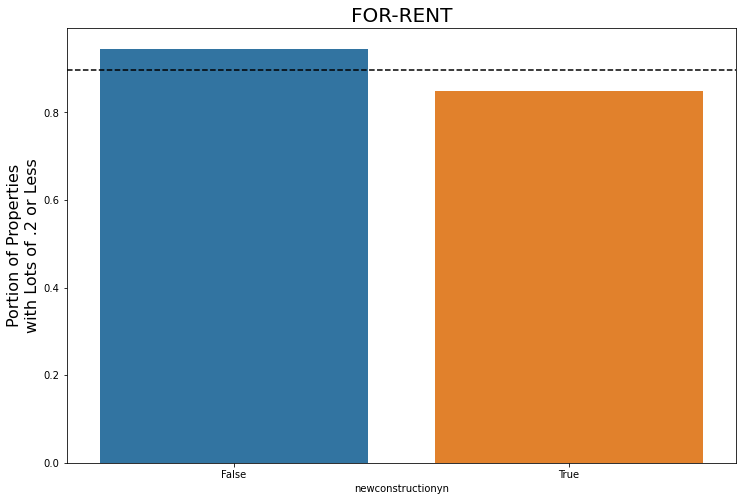

In [52]:
plt.figure(figsize=(12,8))
sns.barplot(data=lotsizearea_small_rates, 
            x=target,
            y='lotsizearea_small')
plt.axhline(sale_df.lotsizearea_small.mean(), ls='--', color='black')
plt.title('FOR-RENT', fontsize=20)
plt.ylabel('Portion of Properties\nwith Lots of .2 or Less', fontsize=16)
plt.show()

It appears that in for-sale listings, a new construction is indeed more likely to have a lot size less than two, though we should run a statistical test to confirm this difference. The opposite appears to be true in for-rent listings, though this may again be due to small sample size. 

I am starting to consider that the for-rent dataset may be too small to model on its own. Perhaps I can combine the two datasets, and simply scale the list price feature separately before modeling. 